# SQL to Jupyter Notebook

In [1]:
import pyodbc

# Define connection parameters
server = '###########'  # Example: 'LAPTOP-XXXX\SQLEXPRESS'
database = '##########'
username = '######'

# Create connection string
conn = pyodbc.connect(
    f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};USERNAME={username};Trusted_Connection=yes;'
)

# Create cursor
cursor = conn.cursor()

# Test connection
cursor.execute("SELECT GETDATE()")  # Fetch current date from SQL Server
print(cursor.fetchone())


(datetime.datetime(2025, 4, 6, 14, 59, 7, 223000),)


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
import geopandas as gpd
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_sql("SELECT * FROM dbo.Major_Crime_Indicators_Open_Data_Jan", conn)
df.head()

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141263217,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,...,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.3067535664125,43.7346540393633,-8828387.42343475,5424470.68790335
1,2,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.4557698128996,43.6777746164058,-8844975.83617071,5415711.72070458
2,3,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.4062233357913,43.7276809740355,-8839460.34758047,5423396.44560775
3,4,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594028346,43.6549463992482,-8840503.4882423,5412198.6966329
4,5,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.3907863389194,43.649125388229,-8837741.90893506,5411303.11756662


In [5]:
df.shape

(420200, 31)

In [6]:
df.isnull().sum()

OBJECTID               0
EVENT_UNIQUE_ID        0
REPORT_DATE            0
OCC_DATE               0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DAY             0
REPORT_DOY             0
REPORT_DOW             0
REPORT_HOUR            0
OCC_YEAR             144
OCC_MONTH            144
OCC_DAY              144
OCC_DOY              144
OCC_DOW              144
OCC_HOUR               0
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
UCR_CODE               0
UCR_EXT                0
OFFENCE                0
MCI_CATEGORY           0
HOOD_158               0
NEIGHBOURHOOD_158      0
HOOD_140               0
NEIGHBOURHOOD_140      0
LONG_WGS84             0
LAT_WGS84              0
x                      0
y                      0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df = df.drop(columns = ['OBJECTID'])

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(389214, 30)

In [11]:
df.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,GO-20141263217,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,2013,...,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.3067535664125,43.7346540393633,-8828387.42343475,5424470.68790335
1,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.4557698128996,43.6777746164058,-8844975.83617071,5415711.72070458
2,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.4062233357913,43.7276809740355,-8839460.34758047,5423396.44560775
3,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,2014,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594028346,43.6549463992482,-8840503.4882423,5412198.6966329
4,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,2013,...,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.3907863389194,43.649125388229,-8837741.90893506,5411303.11756662


In [12]:
filtered_data = df[df["NEIGHBOURHOOD_140"] == "NSA"]
print(filtered_data)

       EVENT_UNIQUE_ID            REPORT_DATE               OCC_DATE  \
94      GO-20141260537    1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
98      GO-20141260577    1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
100     GO-20141260577    1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
101     GO-20141260973    1/1/2014 5:00:00 AM    1/1/2014 5:00:00 AM   
119     GO-20141270511    1/2/2014 5:00:00 AM    1/2/2014 5:00:00 AM   
...                ...                    ...                    ...   
419600  GO-20242782887  12/26/2024 5:00:00 AM  12/26/2024 5:00:00 AM   
419603  GO-20242784769  12/26/2024 5:00:00 AM  12/25/2024 5:00:00 AM   
419979  GO-20242808956  12/30/2024 5:00:00 AM  12/30/2024 5:00:00 AM   
420183  GO-20242815775  12/31/2024 5:00:00 AM    1/1/2024 5:00:00 AM   
420188  GO-20242820719  12/31/2024 5:00:00 AM  12/31/2024 5:00:00 AM   

       REPORT_YEAR REPORT_MONTH REPORT_DAY REPORT_DOY  REPORT_DOW REPORT_HOUR  \
94            2014      January          1          1 

In [13]:
for i in df.columns:
    df = df[df[i] != 'NSA']

In [14]:
df.shape

(383097, 30)

In [15]:
#df['CRIME_CODE'] = df['UCR_CODE'] + df['UCR_EXT']

In [16]:
df.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,GO-20141263217,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,2013,...,Theft Of Motor Vehicle,Auto Theft,043,Victoria Village (43),043,Victoria Village (43),-79.3067535664125,43.7346540393633,-8828387.42343475,5424470.68790335
1,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.4557698128996,43.6777746164058,-8844975.83617071,5415711.72070458
2,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.4062233357913,43.7276809740355,-8839460.34758047,5423396.44560775
3,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,2014,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594028346,43.6549463992482,-8840503.4882423,5412198.6966329
4,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,2013,...,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.3907863389194,43.649125388229,-8837741.90893506,5411303.11756662


In [17]:
#df.index = range(1, len(df) + 1)

In [18]:
df.tail(5)

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
420195,GO-20242816627,12/31/2024 5:00:00 AM,12/24/2024 5:00:00 AM,2024,December,31,366,Tuesday,10,2024,...,Theft Of Motor Vehicle,Auto Theft,033,Clanton Park (33),033,Clanton Park (33),-79.4497055698513,43.7340624475065,-8844300.7677279,5424379.54492206
420196,GO-20242815828,12/31/2024 5:00:00 AM,12/30/2024 5:00:00 AM,2024,December,31,366,Tuesday,7,2024,...,Theft Of Motor Vehicle,Auto Theft,025,Glenfield-Jane Heights (25),025,Glenfield-Jane Heights (25),-79.5132098896586,43.7393845436018,-8851370.03629348,5425199.5216569
420197,GO-20242814680,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,2,2024,...,Robbery - Mugging,Robbery,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.3783041481032,43.6562583953621,-8836352.39778895,5412400.56292985
420198,GO-20242815237,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,4,2024,...,B&E,Break and Enter,032,Englemount-Lawrence (32),032,Englemount-Lawrence (32),-79.4333242834389,43.7194061603331,-8842477.21120053,5422121.823349
420199,GO-20242815267,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,4,2024,...,B&E,Break and Enter,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.4188458270501,43.6441696873932,-8840865.47685114,5410540.73729812


In [19]:
df.dtypes

EVENT_UNIQUE_ID      object
REPORT_DATE          object
OCC_DATE             object
REPORT_YEAR          object
REPORT_MONTH         object
REPORT_DAY           object
REPORT_DOY           object
REPORT_DOW           object
REPORT_HOUR          object
OCC_YEAR             object
OCC_MONTH            object
OCC_DAY              object
OCC_DOY              object
OCC_DOW              object
OCC_HOUR             object
DIVISION             object
LOCATION_TYPE        object
PREMISES_TYPE        object
UCR_CODE             object
UCR_EXT              object
OFFENCE              object
MCI_CATEGORY         object
HOOD_158             object
NEIGHBOURHOOD_158    object
HOOD_140             object
NEIGHBOURHOOD_140    object
LONG_WGS84           object
LAT_WGS84            object
x                    object
y                    object
dtype: object

In [20]:
df['MCI_CATEGORY'].unique()

array(['Auto Theft', 'Assault', 'Break and Enter', 'Theft Over',
       'Robbery'], dtype=object)

In [21]:
# Group by 'NEIGHBOURHOOD_158' and 'MCI_CATEGORY', and count 'EVENT_UNIQUE_ID'
grouped = df.groupby(['NEIGHBOURHOOD_158', 'MCI_CATEGORY'])['EVENT_UNIQUE_ID'].count().reset_index()

# max count for each 'NEIGHBOURHOOD_158'
max_crime = grouped.groupby('NEIGHBOURHOOD_158')['EVENT_UNIQUE_ID'].max().reset_index()


max_crime.columns = ['NEIGHBOURHOOD_158', 'Max_Crime_Count']

print(max_crime)

                      NEIGHBOURHOOD_158  Max_Crime_Count
0                 Agincourt North (129)              755
1    Agincourt South-Malvern West (128)             1386
2                        Alderwood (20)              393
3                            Annex (95)             3093
4                        Avondale (153)              446
..                                  ...              ...
153                   Yonge-Doris (151)              796
154                Yonge-Eglinton (100)              841
155                 Yonge-St.Clair (97)              349
156        York University Heights (27)             3553
157             Yorkdale-Glen Park (31)             1705

[158 rows x 2 columns]


In [22]:
max_crime_sorted = max_crime.sort_values(by = 'Max_Crime_Count',ascending = False)
max_crime_sorted

,NEIGHBOURHOOD_158,Max_Crime_Count
93,Moss Park (73),5529
36,Downtown Yonge East (168),4987
152,Yonge-Bay Corridor (170),4799
139,West Humber-Clairville (1),4781
74,Kensington-Chinatown (78),4201
...,...,...
113,Princess-Rosethorn (10),366
155,Yonge-St.Clair (97),349
78,Lambton Baby Point (114),333
76,Kingsway South (15),324


In [23]:
#  mean of 'Max_Crime_Count' for hotspot prediction
threshold = max_crime_sorted['Max_Crime_Count'].mean()
print(f"The mean of the Max Crime Count is: {threshold}")

The mean of the Max Crime Count is: 1296.8987341772151


In [24]:
threshold = max_crime_sorted['Max_Crime_Count'].mean()

In [25]:
threshold

1296.8987341772151

In [26]:
max_crime_sorted['Hotspot_Neghbourhood'] = (max_crime_sorted['Max_Crime_Count'] > threshold).astype(int)
max_crime_sorted['Hotspot_Neghbourhood']
max_crime_sorted['Hotspot_Neghbourhood'].sum()

50

In [27]:
max_crime_sorted

,NEIGHBOURHOOD_158,Max_Crime_Count,Hotspot_Neghbourhood
93,Moss Park (73),5529,1
36,Downtown Yonge East (168),4987,1
152,Yonge-Bay Corridor (170),4799,1
139,West Humber-Clairville (1),4781,1
74,Kensington-Chinatown (78),4201,1
...,...,...,...
113,Princess-Rosethorn (10),366,0
155,Yonge-St.Clair (97),349,0
78,Lambton Baby Point (114),333,0
76,Kingsway South (15),324,0


In [28]:
df['LOCATION_TYPE'].unique()

array(['Apartment (Rooming House, Condo)',
       'Streets, Roads, Highways (Bicycle Path, Private Road)',
       'Bar / Restaurant', 'Go Train',
       'Parking Lots (Apt., Commercial Or Non-Commercial)',
       'Single Home, House (Attach Garage, Cottage, Mobile)',
       'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg',
       'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)',
       'Retirement Home', 'Open Areas (Lakes, Parks, Rivers)',
       'Gas Station (Self, Full, Attached Convenience)',
       'Ttc Subway Train',
       'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)',
       'Ttc Subway Station', 'Schools During Supervised Activity',
       "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)",
       'Convenience Stores', 'Unknown',
       'Bank And Other Financial Institutions (Money Mart, Tsx)',
       'Jails / Detention Centres',
       'Group Homes (Non-Profit, Halfway House, Social Age

In [29]:
def remove_text_within_parentheses(text):
    # Regex pattern to match text in parentheses
    return re.sub(r'\s*\(.*?\)\s*', ' ', text).strip()

# Apply the function to the 'Location' column
df['LOCATION_TYPE'] = df['LOCATION_TYPE'].apply(remove_text_within_parentheses)

In [30]:
df['LOCATION_TYPE'] = df['LOCATION_TYPE'].replace({'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Other Commercial / Corporate Places', 'Group Homes (Non-Profit, Halfway House': 'Group Homes-NonProfit'})


In [31]:
df['LOCATION_TYPE'].unique()

array(['Apartment', 'Streets, Roads, Highways', 'Bar / Restaurant',
       'Go Train', 'Parking Lots', 'Single Home, House',
       'Other Commercial / Corporate Places', 'Commercial Dwelling Unit',
       'Retirement Home', 'Open Areas', 'Gas Station', 'Ttc Subway Train',
       'Hospital / Institutions / Medical Facilities',
       'Ttc Subway Station', 'Schools During Supervised Activity',
       'Other Non Commercial / Corporate Places', 'Convenience Stores',
       'Unknown', 'Bank And Other Financial Institutions',
       'Jails / Detention Centres', 'Group Homes', 'Ttc Street Car',
       'Private Property Structure', 'Homeless Shelter / Mission',
       'Schools During Un-Supervised Activity', 'Construction Site',
       'Police / Courts', 'Ttc Bus', 'Universities / Colleges',
       'Religious Facilities', 'Dealership',
       'Ttc Bus Stop / Shelter / Loop', 'Go Station',
       'Other Passenger Train', 'Other Regional Transit System Vehicle',
       'Other Passenger Train St

In [32]:
df['LOCATION_TYPE'].value_counts()

LOCATION_TYPE
Apartment                                       92341
Single Home, House                              70912
Streets, Roads, Highways                        57399
Other Commercial / Corporate Places             43869
Parking Lots                                    35014
Bar / Restaurant                                14388
Open Areas                                       7051
Schools During Supervised Activity               5544
Ttc Subway Station                               4945
Convenience Stores                               4815
Commercial Dwelling Unit                         4140
Private Property Structure                       4061
Ttc Bus                                          3237
Hospital / Institutions / Medical Facilities     3144
Schools During Un-Supervised Activity            3135
Other Non Commercial / Corporate Places          3075
Jails / Detention Centres                        2940
Construction Site                                2665
Homeless Shelt

In [33]:
df = pd.merge(df, max_crime_sorted[['NEIGHBOURHOOD_158','Max_Crime_Count' ,'Hotspot_Neghbourhood']], on='NEIGHBOURHOOD_158', how='left')
df.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,Max_Crime_Count,Hotspot_Neghbourhood
0,GO-20141263217,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,2013,...,043,Victoria Village (43),043,Victoria Village (43),-79.3067535664125,43.7346540393633,-8828387.42343475,5424470.68790335,1140,0
1,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.4557698128996,43.6777746164058,-8844975.83617071,5415711.72070458,995,0
2,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.4062233357913,43.7276809740355,-8839460.34758047,5423396.44560775,381,0
3,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,2014,...,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594028346,43.6549463992482,-8840503.4882423,5412198.6966329,792,0
4,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,2013,...,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.3907863389194,43.649125388229,-8837741.90893506,5411303.11756662,4141,1


In [34]:
# Specify the file path or name
#file_path = "output.csv"

# Use the to_csv function to export the DataFrame to a CSV file
#df.to_csv("Cleaned_TPS.csv", index=False)

In [35]:
df_new = df[['EVENT_UNIQUE_ID','OCC_DATE','LOCATION_TYPE','MCI_CATEGORY']]

In [36]:
df_new

,EVENT_UNIQUE_ID,OCC_DATE,LOCATION_TYPE,MCI_CATEGORY
0,GO-20141263217,12/31/2013 5:00:00 AM,Apartment,Auto Theft
1,GO-20141260715,1/1/2014 5:00:00 AM,Apartment,Assault
2,GO-20141260730,1/1/2014 5:00:00 AM,"Streets, Roads, Highways",Assault
3,GO-20141260597,1/1/2014 5:00:00 AM,Apartment,Assault
4,GO-20141259762,12/31/2013 5:00:00 AM,Bar / Restaurant,Assault
...,...,...,...,...
383092,GO-20242816627,12/24/2024 5:00:00 AM,Parking Lots,Auto Theft
383093,GO-20242815828,12/30/2024 5:00:00 AM,Parking Lots,Auto Theft
383094,GO-20242814680,12/31/2024 5:00:00 AM,"Streets, Roads, Highways",Robbery
383095,GO-20242815237,12/31/2024 5:00:00 AM,Other Commercial / Corporate Places,Break and Enter


In [37]:
df_new.OCC_DATE = pd.to_datetime(df_new.OCC_DATE,format = '%m/%d/%Y %I:%M:%S %p')
df_new

,EVENT_UNIQUE_ID,OCC_DATE,LOCATION_TYPE,MCI_CATEGORY
0,GO-20141263217,2013-12-31 05:00:00,Apartment,Auto Theft
1,GO-20141260715,2014-01-01 05:00:00,Apartment,Assault
2,GO-20141260730,2014-01-01 05:00:00,"Streets, Roads, Highways",Assault
3,GO-20141260597,2014-01-01 05:00:00,Apartment,Assault
4,GO-20141259762,2013-12-31 05:00:00,Bar / Restaurant,Assault
...,...,...,...,...
383092,GO-20242816627,2024-12-24 05:00:00,Parking Lots,Auto Theft
383093,GO-20242815828,2024-12-30 05:00:00,Parking Lots,Auto Theft
383094,GO-20242814680,2024-12-31 05:00:00,"Streets, Roads, Highways",Robbery
383095,GO-20242815237,2024-12-31 05:00:00,Other Commercial / Corporate Places,Break and Enter


In [38]:
df_new.dtypes

EVENT_UNIQUE_ID            object
OCC_DATE           datetime64[ns]
LOCATION_TYPE              object
MCI_CATEGORY               object
dtype: object

In [39]:
df_new.index = pd.DatetimeIndex(df_new.OCC_DATE)
df_new.head()

,EVENT_UNIQUE_ID,OCC_DATE,LOCATION_TYPE,MCI_CATEGORY
OCC_DATE,,,,
2013-12-31 05:00:00,GO-20141263217,2013-12-31 05:00:00,Apartment,Auto Theft
2014-01-01 05:00:00,GO-20141260715,2014-01-01 05:00:00,Apartment,Assault
2014-01-01 05:00:00,GO-20141260730,2014-01-01 05:00:00,"Streets, Roads, Highways",Assault
2014-01-01 05:00:00,GO-20141260597,2014-01-01 05:00:00,Apartment,Assault
2013-12-31 05:00:00,GO-20141259762,2013-12-31 05:00:00,Bar / Restaurant,Assault


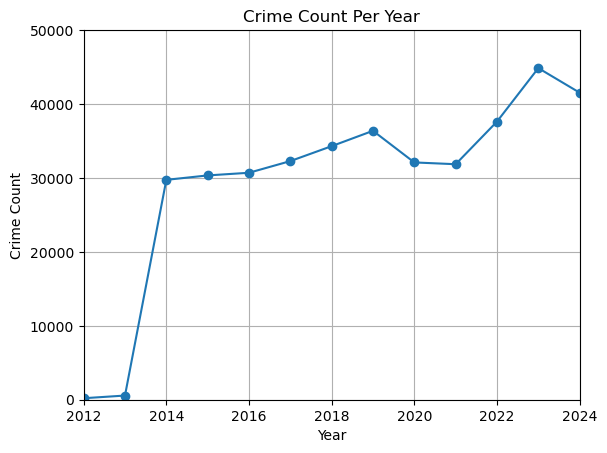

In [40]:
df_new['Year'] = df_new['OCC_DATE'].dt.year
yearly_counts = df_new.groupby('Year').size()

plt.plot(yearly_counts, marker='o')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Count Per Year')
plt.grid(True)
plt.xlim(2012,2024)
plt.ylim(0, 50000)
#plt.xticks
plt.show()


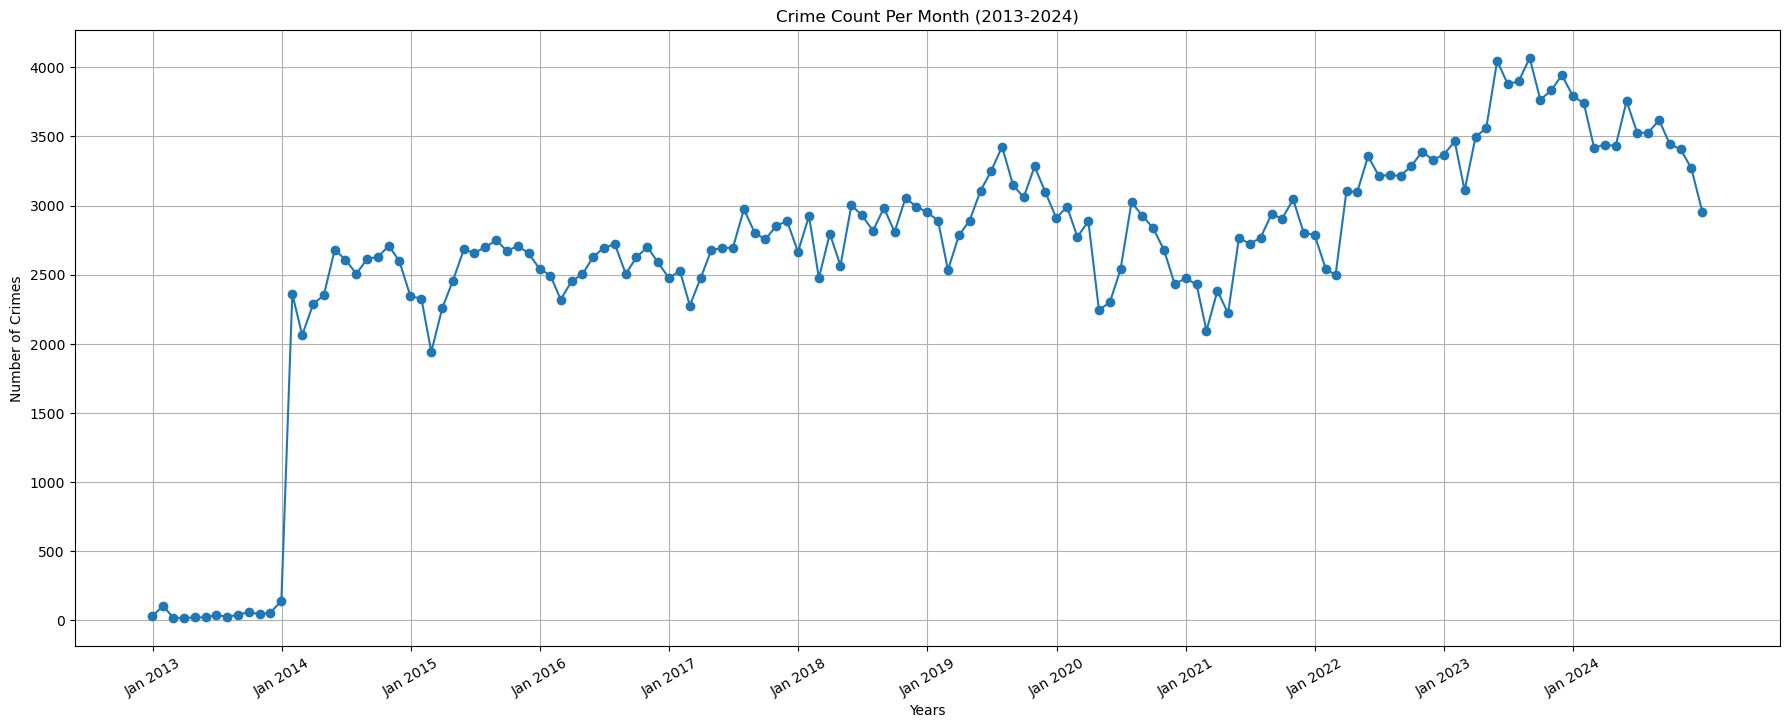

In [41]:
import matplotlib.pyplot as plt

# Resample the data to get monthly crime counts
monthly_counts = df_new.resample('M').size()

# Filter data from 2012 to 2024
monthly_counts_filtered = monthly_counts[(monthly_counts.index >= '2012-12-01') & (monthly_counts.index <= '2024-12-31')]

# Plot the filtered data
plt.figure(figsize=(22, 8))  # Adjust figure size for better visibility
plt.plot(monthly_counts_filtered, marker='o', linestyle='-')
plt.title('Crime Count Per Month (2013-2024)')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
plt.grid(True)

# Customize x-axis labels to show months
plt.xticks(
    ticks=pd.date_range(start='2012-12-01', end='2024-12-31', freq='YS'),  # Start of each month
    labels=[date.strftime('%b %Y') for date in pd.date_range(start='2012-12-01', end='2024-12-31', freq='YS')],  # Format as "Jan 2012", "Feb 2012", etc.
    rotation=30  # Rotate labels for better readability
)

plt.show()


# Preparing Data For Forecasting

In [42]:
df_prophet = pd.DataFrame(df_new.resample('M').size().reset_index())

In [43]:
df_prophet

,OCC_DATE,0
0,2000-01-31,21
1,2000-02-29,1
2,2000-03-31,0
3,2000-04-30,0
4,2000-05-31,0
...,...,...
295,2024-08-31,3618
296,2024-09-30,3445
297,2024-10-31,3406
298,2024-11-30,3270


In [44]:
df_prophet.columns = ['ds','y']
df_prophet

,ds,y
0,2000-01-31,21
1,2000-02-29,1
2,2000-03-31,0
3,2000-04-30,0
4,2000-05-31,0
...,...,...
295,2024-08-31,3618
296,2024-09-30,3445
297,2024-10-31,3406
298,2024-11-30,3270


In [45]:
from prophet import Prophet

In [46]:
m = Prophet() # Model Training
m.fit(df_prophet)

15:00:20 - cmdstanpy - INFO - Chain [1] start processing
15:00:20 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
pred = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(pred)

In [48]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-31,-36.045043,-532.252539,494.124986,-36.045043,-36.045043,16.128382,16.128382,16.128382,16.128382,16.128382,16.128382,0.0,0.0,0.0,-19.916661
1,2000-02-29,-35.662624,-635.643126,413.206071,-35.662624,-35.662624,-64.277716,-64.277716,-64.277716,-64.277716,-64.277716,-64.277716,0.0,0.0,0.0,-99.940340
2,2000-03-31,-35.253830,-587.724923,461.111835,-35.253830,-35.253830,-16.093359,-16.093359,-16.093359,-16.093359,-16.093359,-16.093359,0.0,0.0,0.0,-51.347189
3,2000-04-30,-34.858224,-626.596495,370.767952,-34.858224,-34.858224,-81.443478,-81.443478,-81.443478,-81.443478,-81.443478,-81.443478,0.0,0.0,0.0,-116.301702
4,2000-05-31,-34.449431,-581.057512,460.151674,-34.449431,-34.449431,13.277689,13.277689,13.277689,13.277689,13.277689,13.277689,0.0,0.0,0.0,-21.171742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2025-08-31,3774.737055,3276.494713,4344.127329,3766.426463,3783.987192,45.186460,45.186460,45.186460,45.186460,45.186460,45.186460,0.0,0.0,0.0,3819.923515
308,2025-09-30,3787.338235,3225.049923,4338.730581,3776.983343,3799.171389,7.025805,7.025805,7.025805,7.025805,7.025805,7.025805,0.0,0.0,0.0,3794.364040
309,2025-10-31,3800.359455,3297.068277,4373.836640,3787.920183,3814.393503,17.541551,17.541551,17.541551,17.541551,17.541551,17.541551,0.0,0.0,0.0,3817.901005
310,2025-11-30,3812.960635,3237.577870,4280.814702,3797.690638,3829.385517,-48.386481,-48.386481,-48.386481,-48.386481,-48.386481,-48.386481,0.0,0.0,0.0,3764.574154


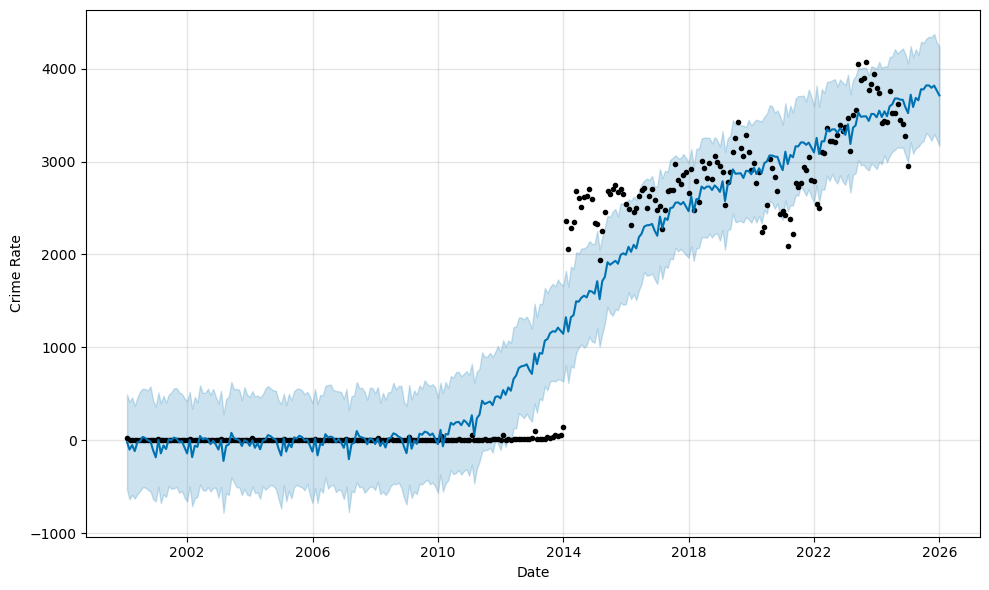

In [49]:
fig = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

In [50]:
from statsmodels.tsa.arima.model import ARIMA

In [51]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
df_prophet.set_index('ds', inplace=True)

In [52]:
df_prophet.sort_index(inplace=True)
df_prophet.head()

,y
ds,
2000-01-31,21
2000-02-29,1
2000-03-31,0
2000-04-30,0
2000-05-31,0


In [53]:
model = ARIMA(df_prophet['y'], order=(1,1,1))
results = model.fit()

C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [54]:
forecast_steps = 24
forecast_values = results.forecast(steps=forecast_steps)

In [55]:
last_date = df_prophet.index[-1]
future_dates = pd.date_range(last_date + pd.DateOffset(months=1),
                             periods=forecast_steps, freq='M')
forecast_series = pd.Series(forecast_values, index=future_dates)

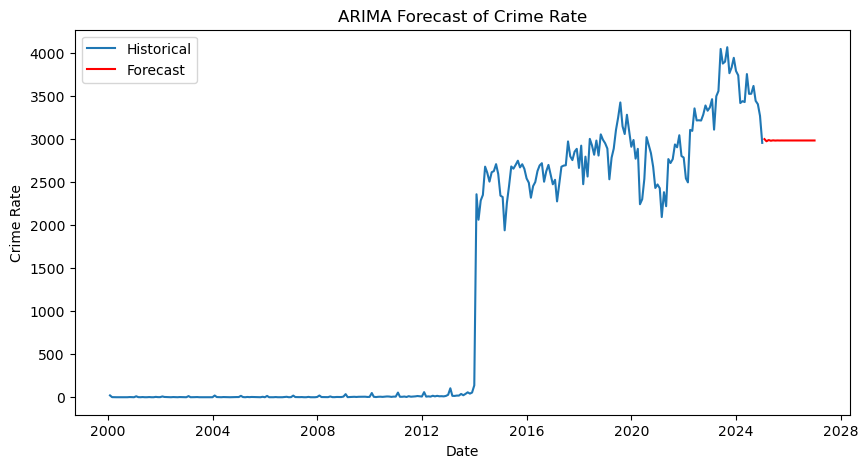

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(df_prophet.index, df_prophet['y'], label='Historical')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.title('ARIMA Forecast of Crime Rate')
plt.xlabel('Date')
plt.ylabel('Crime Rate')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3948.691, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3985.487, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3964.573, Time=0.74 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3968.439, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3984.297, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3970.848, Time=0.47 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3966.003, Time=0.69 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=3950.662, Time=2.18 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3950.655, Time=1.89 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3968.093, Time=1.07 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3961.334, Time=1.26 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.79 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3949.582, Time=1.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3949.644, Time=1.48 sec
 ARIMA(1,1,1)(1,0,1)[12]

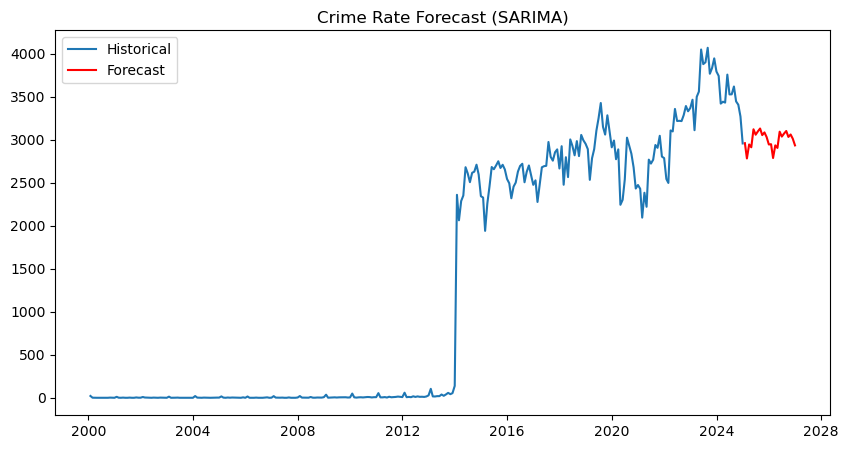

In [57]:
#import pandas as pd
import pmdarima as pm
#import matplotlib.pyplot as plt

# Assume df is already loaded and 'ds' is datetime index, 'y' is the series

auto_model = pm.auto_arima(
    df_prophet['y'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    m=12,                # if you suspect monthly seasonality
    seasonal=True,       # True if seasonal
    d=None, D=None,      # let auto_arima find the best differencing
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

print(auto_model.summary())

# Forecast
n_periods = 24  # forecast 2 years if monthly
future_forecast = auto_model.predict(n_periods=n_periods)

# Build future index
last_date = df_prophet.index[-1]
future_dates = pd.date_range(last_date, periods=n_periods+1, freq='M')[1:] 
forecast_series = pd.Series(future_forecast, index=future_dates)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_prophet['y'], label='Historical')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Crime Rate Forecast (SARIMA)')
plt.legend()
plt.show()


In [58]:
fore = df_prophet['y'].dropna()

In [59]:
ma_centered = fore.rolling(12, center=True).mean()
ma_trailing = fore.rolling(12).mean()
ma_centered_plot = pd.Series(ma_centered[:-1].values, index=ma_centered.index[1:])
ma_trailing_plot = pd.Series(ma_trailing[:-1].values, index=ma_trailing.index[1:])

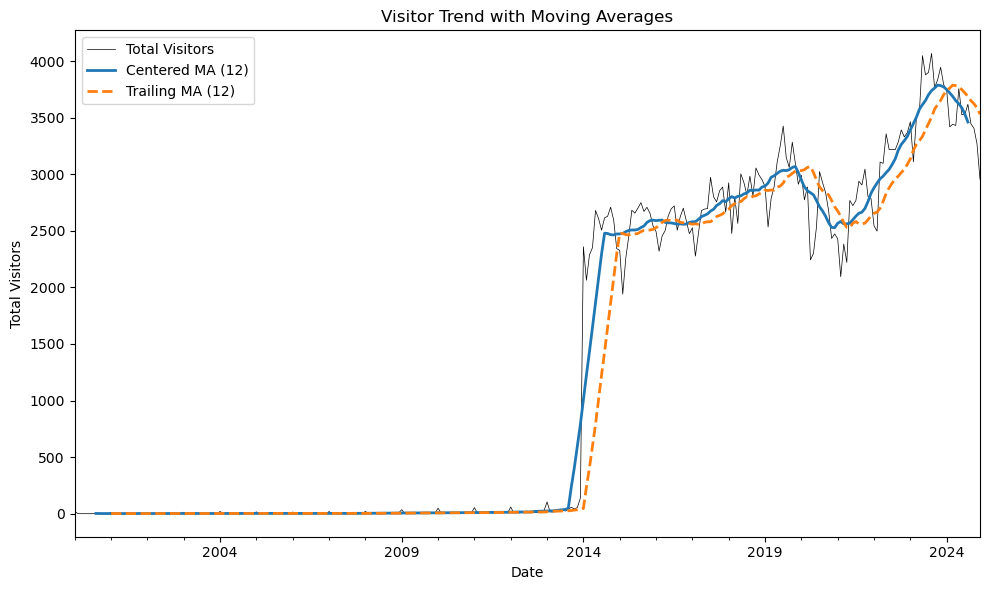

In [60]:
plt.figure(figsize=(10, 6))
fore.plot(color='black', linewidth=0.5, label='Total Visitors')
ma_centered_plot.plot(linewidth=2, label='Centered MA (12)')
ma_trailing_plot.plot(linewidth=2, linestyle='--', label='Trailing MA (12)')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.title('Visitor Trend with Moving Averages')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
nValid = 36
nTrain = len(fore) - nValid
train_ts = fore[:nTrain]
valid_ts = fore[nTrain:]

In [62]:
ma_trailing = train_ts.rolling(12).mean()
last_ma = ma_trailing.dropna().iloc[-1]
ma_trailing_pred = pd.Series(last_ma, index=valid_ts.index)

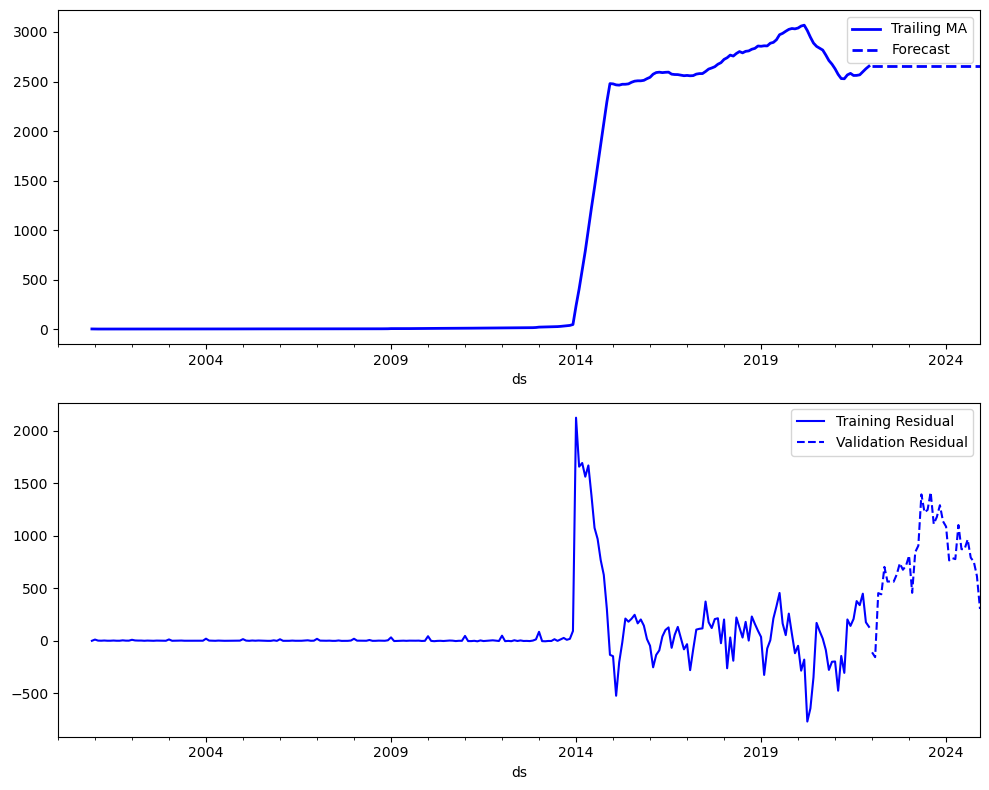

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ma_trailing.plot(ax=axes[0], linewidth=2, color='blue', label='Trailing MA')
ma_trailing_pred.plot(ax=axes[0], linewidth=2, linestyle='--', color='blue', label='Forecast')
axes[0].legend()
train_residual = train_ts - ma_trailing
valid_residual = valid_ts - ma_trailing_pred
train_residual.plot(ax=axes[1], color='blue', label='Training Residual')
valid_residual.plot(ax=axes[1], linestyle='--', color='blue', label='Validation Residual')
axes[1].legend()
plt.tight_layout()
plt.show()

In [64]:
arima_model = ARIMA(train_ts, order=(1, 1, 1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=nValid)

C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [65]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
expSmooth = ExponentialSmoothing(train_residual.dropna(), trend=None, seasonal=None)
expSmoothFit = expSmooth.fit(smoothing_level=0.2)
exp_forecast = expSmoothFit.forecast(len(valid_ts))

C:\Users\KEYUR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [66]:
final_forecast = ma_trailing_pred + exp_forecast

In [67]:
mae = mean_absolute_error(valid_ts, final_forecast)
rmse = np.sqrt(mean_squared_error(valid_ts, final_forecast))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 656.21
Root Mean Squared Error (RMSE): 717.10


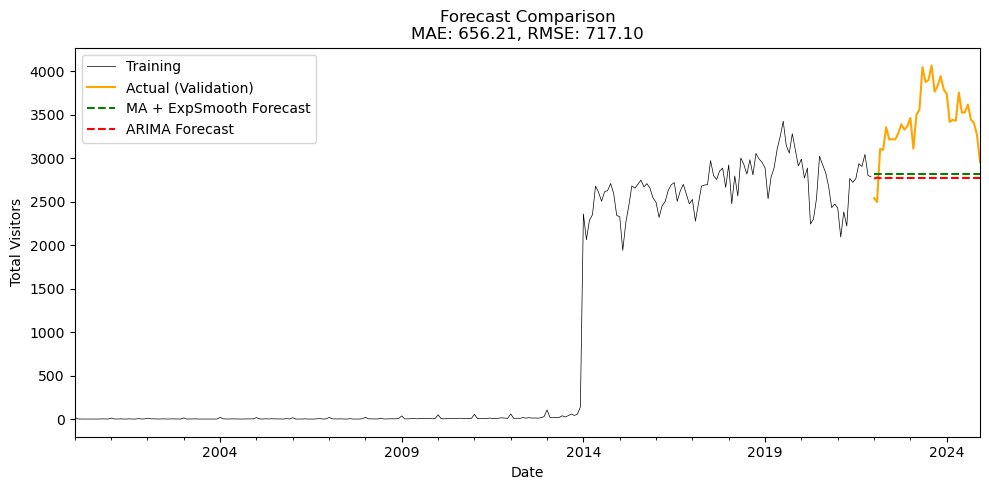

In [68]:
plt.figure(figsize=(10, 5))
train_ts.plot(label='Training', color='black', linewidth=0.5)
valid_ts.plot(label='Actual (Validation)', color='orange')
final_forecast.plot(label='MA + ExpSmooth Forecast', linestyle='--', color='green')
arima_forecast.plot(label='ARIMA Forecast', linestyle='--', color='red')
plt.title(f'Forecast Comparison\nMAE: {mae:.2f}, RMSE: {rmse:.2f}')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
forecast_df = pd.DataFrame({
    'Actual': valid_ts,
    'MA + ExpSmooth Forecast': final_forecast,
    'ARIMA Forecast': arima_forecast
})

forecast_df

,Actual,MA + ExpSmooth Forecast,ARIMA Forecast
2022-01-31,2543,2822.480377,2765.762074
2022-02-28,2497,2822.480377,2778.055553
2022-03-31,3107,2822.480377,2770.587909
2022-04-30,3096,2822.480377,2775.124111
2022-05-31,3357,2822.480377,2772.368606
2022-06-30,3217,2822.480377,2774.042431
2022-07-31,3219,2822.480377,2773.025670
2022-08-31,3216,2822.480377,2773.643299
2022-09-30,3285,2822.480377,2773.268122
2022-10-31,3391,2822.480377,2773.496022


In [70]:
# STPM
df.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,...,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y,Max_Crime_Count,Hotspot_Neghbourhood
0,GO-20141263217,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,16,2013,...,043,Victoria Village (43),043,Victoria Village (43),-79.3067535664125,43.7346540393633,-8828387.42343475,5424470.68790335,1140,0
1,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.4557698128996,43.6777746164058,-8844975.83617071,5415711.72070458,995,0
2,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,2014,...,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.4062233357913,43.7276809740355,-8839460.34758047,5423396.44560775,381,0
3,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,2014,...,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594028346,43.6549463992482,-8840503.4882423,5412198.6966329,792,0
4,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,2013,...,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.3907863389194,43.649125388229,-8837741.90893506,5411303.11756662,4141,1


In [71]:
from scipy.spatial.distance import pdist, squareform

In [72]:
filtered_data.dtypes
filtered_data['LONG_WGS84'] = pd.to_numeric(filtered_data['LONG_WGS84'], errors='coerce')
filtered_data['LAT_WGS84'] = pd.to_numeric(filtered_data['LAT_WGS84'], errors='coerce')

In [73]:
# Calculate spatial distance matrix
spatial_coords = filtered_data[['LONG_WGS84', 'LAT_WGS84']].values
spatial_distances = squareform(pdist(spatial_coords))
#print(spatial_coords)
#print(spatial_distances)

In [74]:
spatial_distances.shape

(6117, 6117)

# Clustering

In [75]:
# Calculate temporal distance matrix (in days)
temporal_dates = pd.to_datetime(filtered_data['REPORT_DATE']).astype('int64') // 10**9  # Convert to seconds
temporal_distances = squareform(pdist(temporal_dates.values.reshape(-1, 1)))


In [76]:
def compute_temporal_distances(report_dates):
    timestamps = filtered_data['REPORT_DATE'].astype('int64') // 10**9  # Convert to seconds
    return np.abs(timestamps[:, None] - timestamps)  # Faster distance calculation

In [77]:
def detect_clusters(spatial_distances, temporal_distances, spatial_threshold=0.01, temporal_threshold=7):
    spatial_mask = spatial_distances <= spatial_threshold
    temporal_mask = temporal_distances <= temporal_threshold
    cluster_mask = spatial_mask & temporal_mask  # Element-wise AND
    
    clusters = []
    for i in range(len(spatial_distances)):
        cluster = np.where(cluster_mask[i])[0]
        if len(cluster) > 1:
            clusters.append(tuple(cluster))  # Store as tuple to avoid duplicates
    return list(set(clusters))

In [78]:
def permutation_test(spatial_distances, temporal_distances, num_permutations=99):
    observed_clusters = detect_clusters(spatial_distances, temporal_distances)
    observed_cluster_count = len(observed_clusters)
    permuted_counts = np.zeros(num_permutations)
    
    for i in range(num_permutations):
        permuted_dates = np.random.permutation(temporal_distances[0])  # Shuffle only once
        permuted_temporal_distances = np.abs(permuted_dates[:, None] - permuted_dates)
        permuted_counts[i] = len(detect_clusters(spatial_distances, permuted_temporal_distances))
    
    p_value = (np.sum(permuted_counts >= observed_cluster_count) + 1) / (num_permutations + 1)
    return observed_clusters, p_value

In [79]:
clusters,p_value = permutation_test(spatial_distances, temporal_distances)

In [80]:
from libpysal.weights import KNN
from esda.moran import Moran_Local

In [81]:
import geopandas as gpd

In [82]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONG_WGS84, df.LAT_WGS84))

In [83]:
# Calculate a spatial weights matrix
w = KNN.from_dataframe(gdf, k=3)  # adjust 'k' as needed

# The 'li' object now contains the results of the local Moran's I analysis

In [84]:
print(len(gdf))

383097


In [85]:
w.transform = 'B'  # Binary transformation for sparse storage

In [86]:
# Perform a local Moran's I analysis
li = Moran_Local(gdf['Max_Crime_Count'], w)

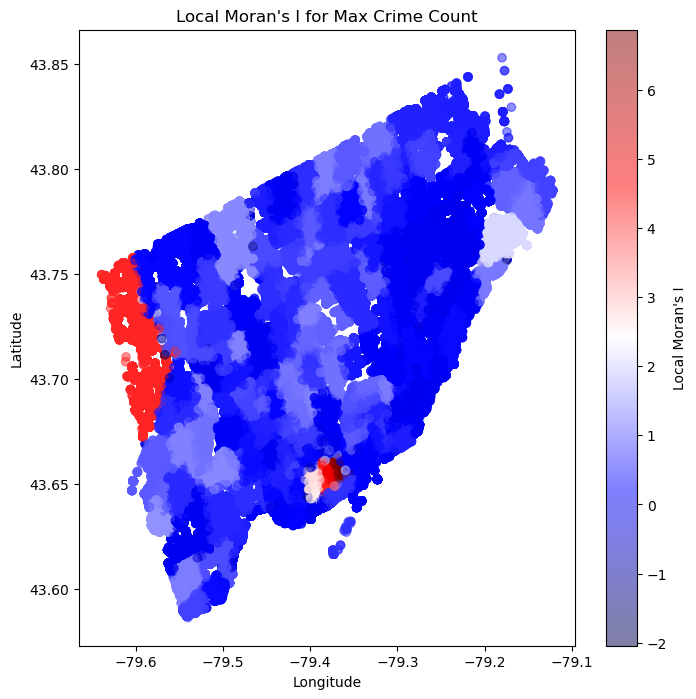

In [87]:
# Create a scatter plot of the local Moran's I values
fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=li.Is, cmap='seismic', alpha=0.5)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Local Moran\'s I')

# Set the title and labels
ax.set_title('Local Moran\'s I for Max Crime Count')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [88]:
df['LONG_WGS84'] = df['LONG_WGS84'].astype(float)
df['LAT_WGS84'] = df['LAT_WGS84'].astype(float)

In [89]:
coords = df[['LONG_WGS84', 'LAT_WGS84']].values

In [90]:
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)
df['cluster'] = db.labels_

In [91]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['LONG_WGS84'], df['LAT_WGS84'])
)

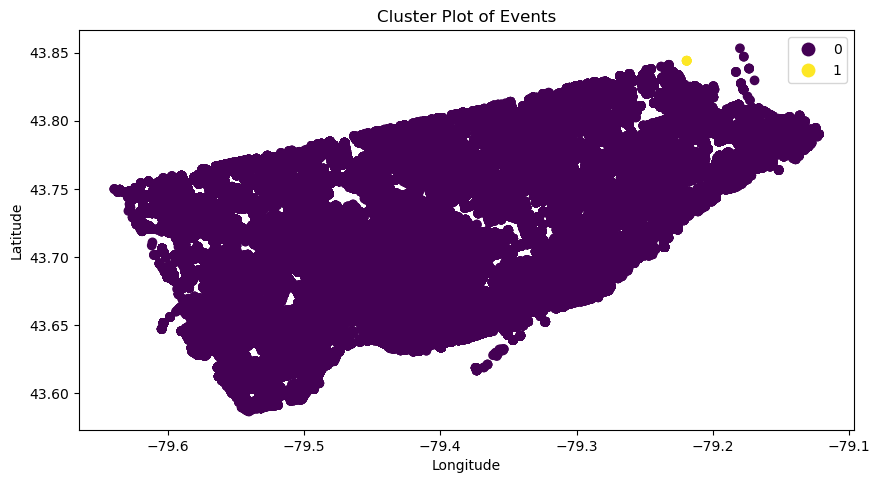

In [92]:
# Plot the clusters
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column='cluster', categorical=True, legend=True, ax=ax, cmap='viridis')
plt.title("Cluster Plot of Events")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [93]:
# Assume df has columns: 'LONG_WGS84', 'LAT_WGS84', and 'OCC_DATE'
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])
# Convert dates to a numerical scale (e.g., days)
# Using Unix timestamp (seconds) and then converting to days
df['OCC_TIMESTAMP'] = df['OCC_DATE'].astype(np.int64) // 10**9 / (24 * 3600)

# Set your thresholds
spatial_eps = 0.01    # Spatial threshold (in degrees or your unit)
temporal_eps = 7.0    # Temporal threshold (in days)

# Scale the time dimension so that temporal differences are comparable to spatial ones
# For example, multiplying the timestamp by (spatial_eps / temporal_eps)
scaled_time = df['OCC_TIMESTAMP'] * (spatial_eps / temporal_eps)

# Create a feature array combining spatial coordinates and scaled time
X = np.column_stack((df['LONG_WGS84'], df['LAT_WGS84'], scaled_time))


In [94]:
# Run DBSCAN: Note that eps here is effectively the spatial threshold
dbscan = DBSCAN(eps=spatial_eps, min_samples=5)
df['cluster'] = dbscan.fit_predict(X)

print(df[['LONG_WGS84', 'LAT_WGS84', 'OCC_DATE', 'cluster']].head())

   LONG_WGS84  LAT_WGS84            OCC_DATE  cluster
0  -79.306754  43.734654 2013-12-31 05:00:00        0
1  -79.455770  43.677775 2014-01-01 05:00:00        0
2  -79.406223  43.727681 2014-01-01 05:00:00       -1
3  -79.415594  43.654946 2014-01-01 05:00:00        0
4  -79.390786  43.649125 2013-12-31 05:00:00        0


In [95]:
# Assume df has columns: 'LONG_WGS84', 'LAT_WGS84', and 'OCC_DATE'
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])
# Convert dates to a numerical scale (e.g., days)
# Using Unix timestamp (seconds) and then converting to days
df['OCC_TIMESTAMP'] = df['OCC_DATE'].astype(np.int64) // 10**9 / (24 * 3600)

In [96]:
# Set your thresholds
spatial_eps = 0.01    # Spatial threshold (in degrees or your unit)
temporal_eps = 7.0    # Temporal threshold (in days)

In [97]:
# Scale the time dimension so that temporal differences are comparable to spatial ones
# For example, multiplying the timestamp by (spatial_eps / temporal_eps)
scaled_time = df['OCC_TIMESTAMP'] * (spatial_eps / temporal_eps)

In [98]:
X = np.column_stack((df['LONG_WGS84'], df['LAT_WGS84'], scaled_time))

In [99]:
# Run DBSCAN: Note that eps here is effectively the spatial threshold
dbscan = DBSCAN(eps=spatial_eps, min_samples=5)

In [100]:
df['cluster'] = dbscan.fit_predict(X)

In [101]:
print(df[['LONG_WGS84', 'LAT_WGS84', 'OCC_DATE', 'cluster']].head())

   LONG_WGS84  LAT_WGS84            OCC_DATE  cluster
0  -79.306754  43.734654 2013-12-31 05:00:00        0
1  -79.455770  43.677775 2014-01-01 05:00:00        0
2  -79.406223  43.727681 2014-01-01 05:00:00       -1
3  -79.415594  43.654946 2014-01-01 05:00:00        0
4  -79.390786  43.649125 2013-12-31 05:00:00        0


In [102]:
import geopandas as gpd

# Create a GeoDataFrame from your DataFrame 'df'
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONG_WGS84'], df['LAT_WGS84']))


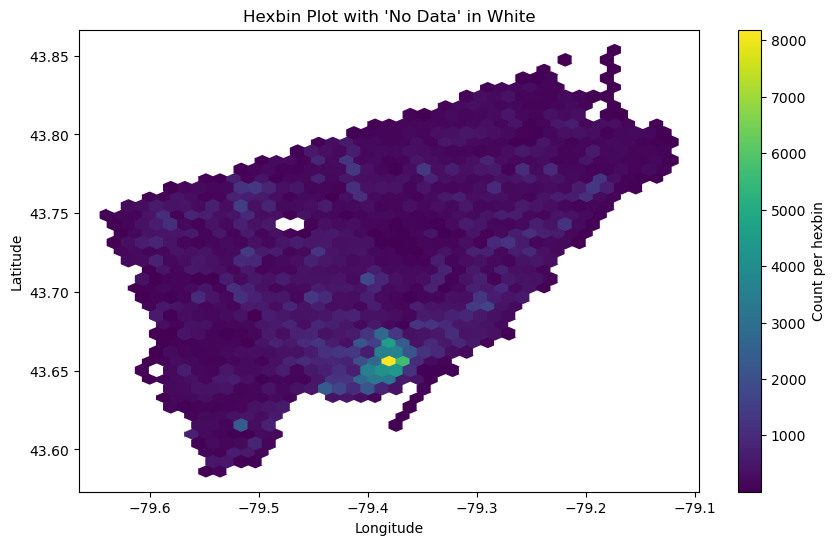

In [103]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(10, 6),dpi = 100)

# Set the axes facecolor (actual background)
ax.set_facecolor('white')

# Make a copy of a colormap and set its "under" color
cmap = plt.cm.viridis.copy()
cmap.set_under('white')  # bins below vmin will appear white

# Create the hexbin, specifying vmin=1 so zero-count bins are "under"
hx = ax.hexbin(
    gdf.geometry.x,
    gdf.geometry.y,
    gridsize=40,
    cmap=cmap,
    vmin=1
)

plt.colorbar(hx, ax=ax, label='Count per hexbin')
ax.set_title("Hexbin Plot with 'No Data' in White")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [104]:
from sklearn.cluster import MiniBatchKMeans

In [105]:
gdf = gpd.GeoDataFrame(
    df, 
    geometry=gpd.points_from_xy(df['LONG_WGS84'], df['LAT_WGS84']),
    crs="EPSG:4326"  # WGS84, used for lat/lon data
)

print(gdf.crs)

EPSG:4326


In [106]:
X = gdf[['LAT_WGS84', 'LONG_WGS84']]

In [107]:
minikmeans = MiniBatchKMeans(n_clusters=5, random_state=0, batch_size=1000)

In [108]:
minikmeans.fit(X)

MiniBatchKMeans(batch_size=1000, n_clusters=5, random_state=0)

In [109]:
gdf['cluster'] = minikmeans.labels_

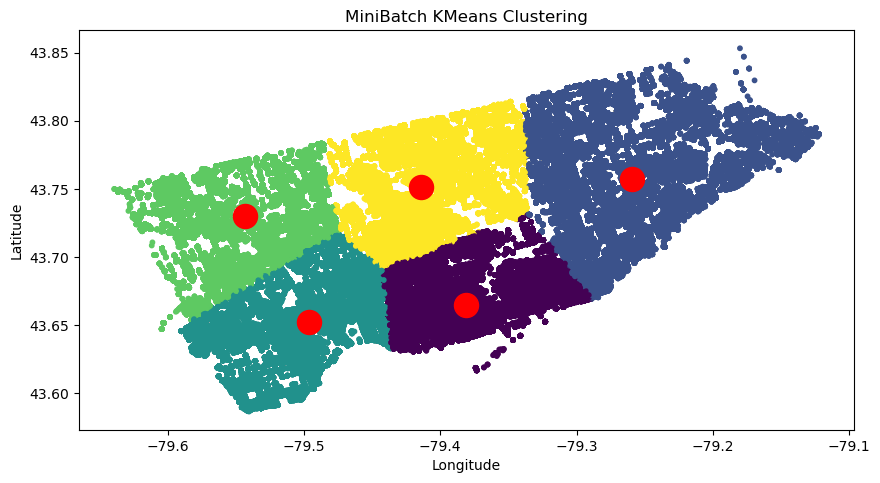

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(gdf['LONG_WGS84'], gdf['LAT_WGS84'], c=gdf['cluster'], s=10, cmap='viridis')

# Plot the cluster centers
plt.scatter(minikmeans.cluster_centers_[:, 1], minikmeans.cluster_centers_[:, 0], 
            s=300, c='red', marker='o', label='Cluster Centers')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('MiniBatch KMeans Clustering')
#plt.legend()
plt.show()

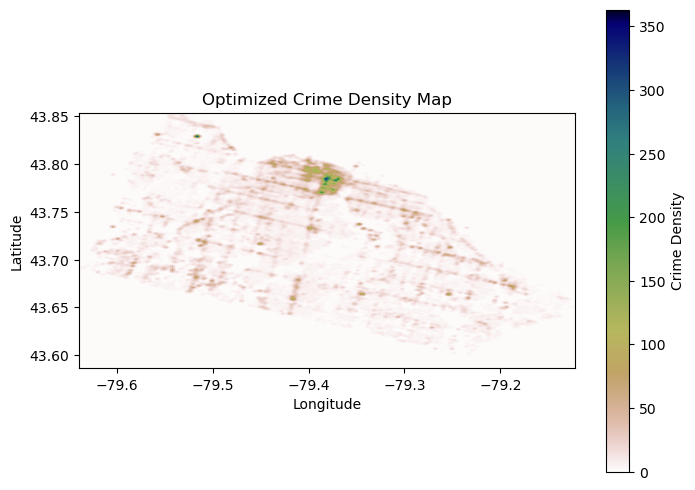

In [111]:
#import numpy as np
#import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Assume your DataFrame 'df' has columns 'LAT_WGS84' and 'LONG_WGS84'

# Define grid boundaries using the data's min and max values
lat_min, lat_max = df['LAT_WGS84'].min(), df['LAT_WGS84'].max()
long_min, long_max = df['LONG_WGS84'].min(), df['LONG_WGS84'].max()

# Choose the number of bins for the histogram; adjust for desired resolution
bins = 300

# Compute a 2D histogram of the data points
H, lat_edges, long_edges = np.histogram2d(
    df['LAT_WGS84'], df['LONG_WGS84'],
    bins=bins, 
    range=[[lat_min, lat_max], [long_min, long_max]]
)

# Smooth the histogram with a Gaussian filter; adjust sigma for smoothing effect
H_smooth = gaussian_filter(H, sigma=1)

# Define the extent of the plot based on the histogram bin edges
extent =[long_min, long_max, lat_min, lat_max]

# Plot the smoothed density map
plt.figure(figsize=(8, 6),dpi=100)
density_to_plot = H_smooth
plt.imshow(density_to_plot, cmap='gist_earth_r',extent=extent,aspect='equal')
plt.colorbar(label='Crime Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimized Crime Density Map')
plt.show()


In [112]:
from sklearn.neighbors import KernelDensity

In [113]:
# Create a KernelDensity object
kde = KernelDensity(kernel='gaussian', bandwidth=0.02,algorithm='ball_tree')

In [114]:
# Fit the model to your data
kde.fit(X)

KernelDensity(algorithm='ball_tree', bandwidth=0.02)

In [115]:
num_chunks = 10

chunks = np.array_split(X,num_chunks)

density_list = []

In [116]:
#for i, chunk in enumerate(chunks):
 #   density_chunk = np.exp(kde.score_samples(chunk))
  #  density_list.append(density_chunk)

In [117]:
for i, chunk in enumerate(chunks):
    density_chunk = np.exp(kde.score_samples(chunk))
    density_list.append(density_chunk)
    print(f"Processed chunk {i+1} of {num_chunks}")

Processed chunk 1 of 10
Processed chunk 2 of 10
Processed chunk 3 of 10
Processed chunk 4 of 10
Processed chunk 5 of 10
Processed chunk 6 of 10
Processed chunk 7 of 10
Processed chunk 8 of 10
Processed chunk 9 of 10
Processed chunk 10 of 10


In [118]:
# Combine all the density values back into a single array
density_all = np.concatenate(density_list)

# Assign the computed densities to the DataFrame
df['density'] = density_all

In [119]:
from scipy.stats import gaussian_kde


In [120]:
# Fit the KDE model
kde = gaussian_kde(df[['LAT_WGS84', 'LONG_WGS84']].T)


In [121]:
# Create a grid of points
x, y = np.mgrid[df['LAT_WGS84'].min():df['LAT_WGS84'].max():100j, df['LONG_WGS84'].min():df['LONG_WGS84'].max():100j]
positions = np.vstack([x.ravel(), y.ravel()])

In [122]:
# Evaluate the KDE model on the grid
Z = np.reshape(kde(positions).T, x.shape)

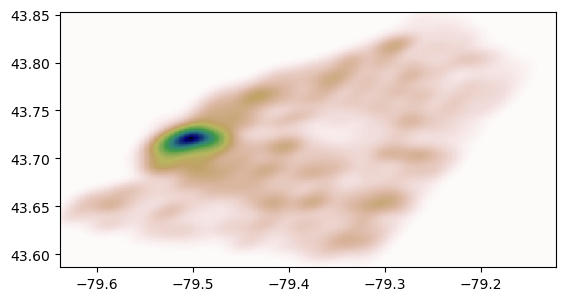

In [123]:
# Plot the result
plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[df['LONG_WGS84'].min(), df['LONG_WGS84'].max(), df['LAT_WGS84'].min(), df['LAT_WGS84'].max()])#,interpolation='nearest')
plt.show()

In [126]:
def draw_hn_by_feature(feature, dataframe, size=(10, 6)):
    plt.figure(figsize = size)
    sns.countplot(x= feature, hue='MCI_CATEGORY', data= dataframe)
    plt.title(f'Crimes by {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

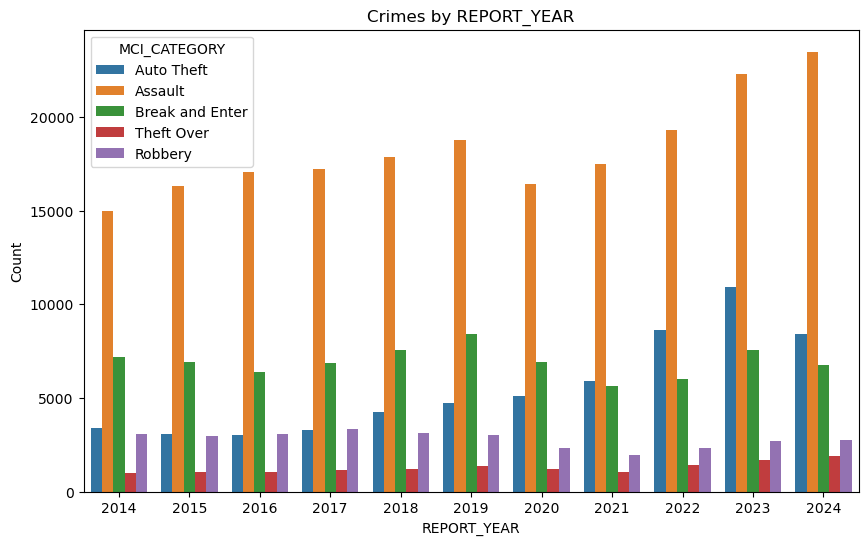

In [127]:
draw_hn_by_feature('REPORT_YEAR', df)